In [1]:
# Install required module (if not exists)
#!pip3 install pandas
#!pip3 install scikit-learn

In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import pandas as pd
import random
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import rand_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

# Set random seed for numpy and sklearn (scikit-learn)
np.random.seed(0)

# It will make your graph more fancy
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 11.5

# **Datascience Lab 14**

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

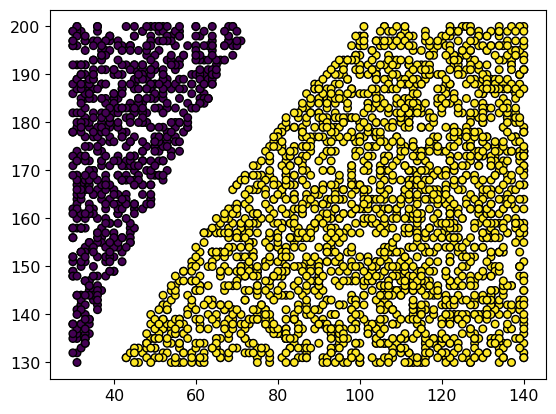

X shape is  (3000, 2) Y shape is  (3000,)


In [3]:
def bmi_generator():
    while True:
        weight = random.randint(30, 140)
        height = random.randint(130, 200)
        bmi = weight / (height/100) ** 2
        if bmi<18.5:
            y = 0 # thin
        elif bmi>=25:
            y = 1 # fat
        else:
            continue # normal
        yield [weight, height], y
    
X = []
Y = []

bmi_gen = bmi_generator()

for i in range(3000):
    x, y = next(bmi_gen)
    X.append(x)
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

bmi_map = {0: 'thin', 1: 'fat'}

plt.scatter(X[:,0], X[:,1],c= Y, s=30, edgecolors= 'black')
plt.show()
print('X shape is ', X.shape, 'Y shape is ', Y.shape)


## Lab 14-1: kmeans (4 points)
- Do kmeans clustering. Compare the graphs according to the number of clusters (3 vs 4). Set the `random_state` as 0
- Paint in 'b', 'y', 'm', 'g' to the order on the label.
- Set the center point size to 100 and color to red
- Set the edgecolor to black
- You have to subplot two graphs

### Hint
- `cluster_centers`
- `labels_`
- `KMeans`

### Reference
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

/home/dgist/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dgist/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_195702/630604717.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'T

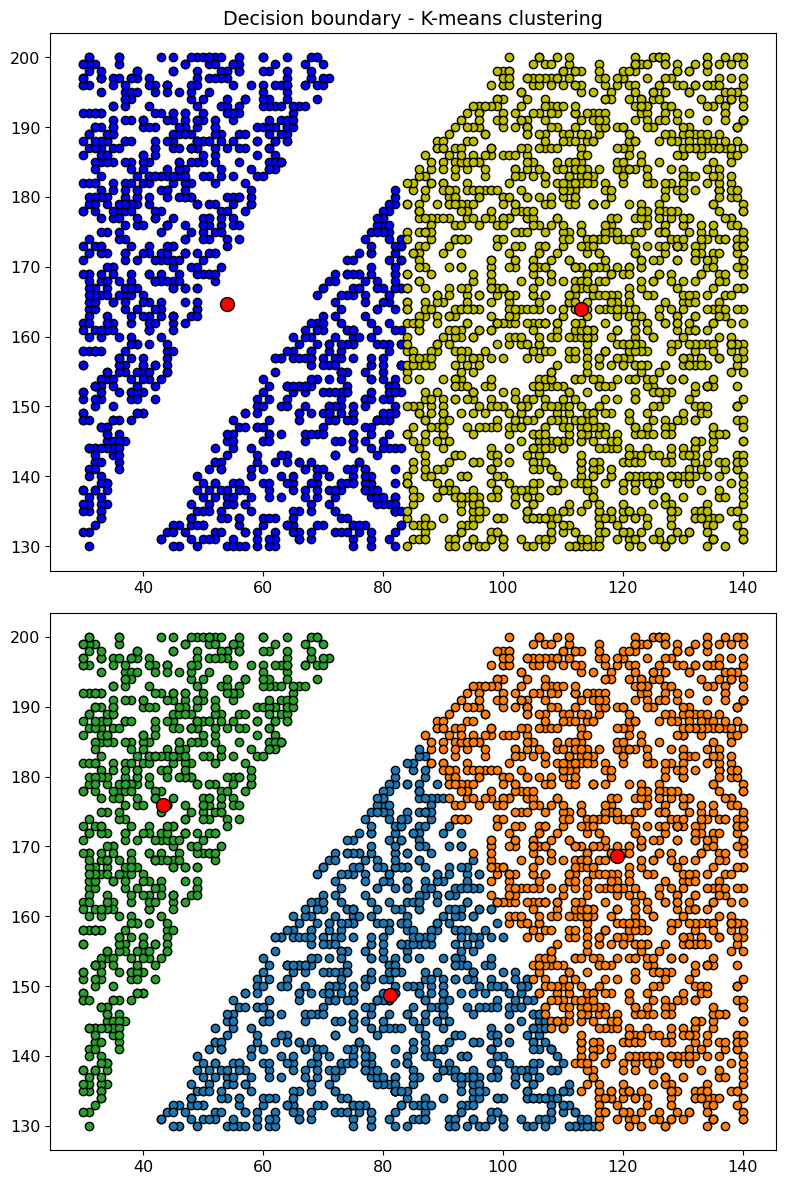

In [4]:
### -------- LAB 14-1 START -------- ###
color = {0 : 'b', 1: 'y', 2: 'k'}

# do Kmeans
# fit model, for compared kmeans between n_clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(X)

# set the colormap
cmap = plt.cm.get_cmap('tab10')

# find the center of each cluster
centers = kmeans.cluster_centers_
centers2 = kmeans2.cluster_centers_

# Plot the graph 
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# Plot for k=3
labels = kmeans.labels_
for i in range(2):
    cluster_points = X[labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], color=color[i], edgecolors= 'black')
axes[0].scatter(centers[:, 0], centers[:, 1], s=100, c='r', edgecolor='black')
axes[0].set_title('Decision boundary - K-means clustering')

# Plot for k=4
labels2 = kmeans2.labels_
for i in range(3):
    cluster_points = X[labels2 == i]
    axes[1].scatter(cluster_points[:, 0], cluster_points[:, 1], color=cmap(i), edgecolors= 'black')
axes[1].scatter(centers2[:, 0], centers2[:, 1], s=100, c='r', edgecolor='black')

plt.tight_layout()
plt.show()
### --------- LAB 14-1 END --------- ###

### Evaluation code

In [5]:
print('The rand_score is',rand_score(Y, kmeans.predict(X)))
print('Adjusted rand score is', adjusted_rand_score(Y, kmeans.predict(X)))
print('Adjusted mutual information score is', adjusted_mutual_info_score(Y, kmeans.predict(X)))

The rand_score is 0.7252526397688118
Adjusted rand score is 0.44457561988647376
Adjusted mutual information score is 0.451932486922477


In [6]:
print('The rand_score is',rand_score(Y, kmeans2.predict(X)))
print('Adjusted rand score is', adjusted_rand_score(Y, kmeans2.predict(X)))
print('Adjusted mutual information score is', adjusted_mutual_info_score(Y, kmeans2.predict(X)))

The rand_score is 0.7195287317994887
Adjusted rand score is 0.4799576692584896
Adjusted mutual information score is 0.6801351735386724


## Q. Why does "k-means clustering" sometimes fail to work correctly for this dataset?

### When the dataset has problem, KMeans clustering sometimes fails to work correctly. <br> Beacause Kmeans is not trainned.


---
## Lab 14-2: Principal Component Analysis (6 points)
- Using Iris dataset, Do dimensionality reduction with PCA. Choose the n_component to 2.
- Before PCA, you have to pre-processing dataset (X - sepal length/width, petal length/width) with `StandardScaler()`.
- Print the PCA variance ratio.
- Plot the graph with two components

### Hint
- `StandardScaler()`
- `fit_transform`
- `explained_variance_ratio_`

### Reference
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [7]:
### -------- LAB 14-2 START -------- ###
# Load iris dataset
iris = load_iris()
X = iris.data


In [8]:
# Preprocessing start (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


Variance Ratio: [0.72962445 0.22850762]


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

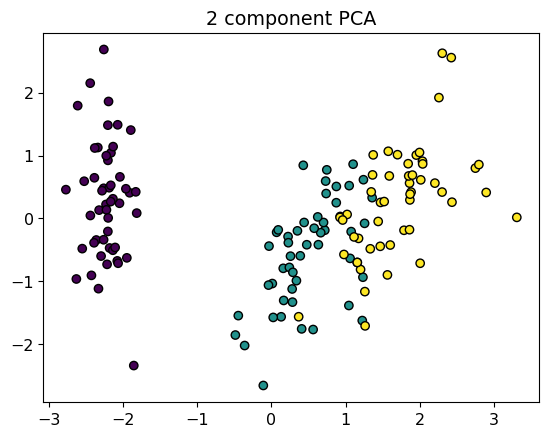

In [9]:
# PCA start
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Variance Ratio:", pca.explained_variance_ratio_)

# plot graph
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, edgecolors= 'black')
plt.title('2 component PCA')
plt.show()

### ----- Data science LAB END ----- ###